In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", 
                                       ("http://archive.ics.uci.edu/ml/machine-learning-databases"
                                        "/auto-mpg/auto-mpg.data"))
dataset_path

'/home/vahid/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df_raw = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

df = df_raw.copy()
df.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Clean the data

In [4]:
df.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
df = df.dropna()

df = df.reset_index(drop=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
origin = df.pop('Origin')

type(origin)

pandas.core.series.Series

In [7]:
df['origin-1'] = (origin == 1)*1.0
df['origin-2'] = (origin == 2)*1.0
df['origin-3'] = (origin == 3)*1.0

df.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin-1,origin-2,origin-3
387,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
388,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
389,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
390,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
391,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [8]:
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)

df_train.tail()

/home/vahid/anaconda3/envs/tf2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin-1,origin-2,origin-3
123,11.0,8,350.0,180.0,3664.0,11.0,73,1.0,0.0,0.0
248,19.4,8,318.0,140.0,3735.0,13.2,78,1.0,0.0,0.0
76,22.0,4,121.0,76.0,2511.0,18.0,72,0.0,1.0,0.0
67,13.0,8,350.0,155.0,4502.0,13.5,72,1.0,0.0,0.0
51,30.0,4,88.0,76.0,2065.0,14.5,71,0.0,1.0,0.0


In [9]:
train_stats = df_train.describe().transpose()

train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.612780,7.621164,10.0,17.7,23.0,29.0,46.6
Cylinders,313.0,5.412141,1.692587,3.0,4.0,4.0,6.0,8.0
Displacement,313.0,190.094249,101.015857,68.0,105.0,141.0,260.0,455.0
Horsepower,313.0,102.581470,36.149892,46.0,76.0,92.0,120.0,230.0
Weight,313.0,2948.466454,817.203926,1649.0,2226.0,2774.0,3563.0,5140.0
Acceleration,313.0,15.571246,2.771351,8.0,13.7,15.5,17.0,24.8
Model Year,313.0,76.134185,3.624332,70.0,73.0,76.0,79.0,82.0
origin-1,313.0,0.626198,0.484587,0.0,0.0,1.0,1.0,1.0
origin-2,313.0,0.188498,0.391736,0.0,0.0,0.0,0.0,1.0
origin-3,313.0,0.185304,0.389166,0.0,0.0,0.0,0.0,1.0


 * Normalize train and test

In [10]:
df_train_norm = (df_train - train_stats['mean']) / train_stats['std']

df_test_norm = (df_test - train_stats['mean']) / train_stats['std']

df_test_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,79.0,-0.108641,1.117156,-1.917395,-1.195720,-0.211619,0.693755,2.753808
Cylinders,79.0,0.175306,1.032683,-0.834309,-0.834309,0.347314,1.528937,1.528937
Displacement,79.0,0.212093,1.158877,-1.169066,-0.842385,-0.218721,1.127603,2.622417
Horsepower,79.0,0.259140,1.276266,-1.509865,-0.762975,-0.209723,1.311720,3.386415
Weight,79.0,0.176802,1.179128,-1.634190,-0.869999,-0.059308,1.213325,2.395404
Acceleration,79.0,-0.053570,0.982562,-2.551552,-0.585002,-0.025708,0.659878,2.139301
Model Year,79.0,-0.211652,1.068768,-1.692501,-1.140675,-0.312936,0.652759,1.618454
origin-1,79.0,-0.012268,1.007921,-1.292231,-1.292231,0.771383,0.771383,0.771383
origin-2,79.0,-0.190369,0.816237,-0.481187,-0.481187,-0.481187,-0.481187,2.071553
origin-3,79.0,0.206902,1.142426,-0.476156,-0.476156,-0.476156,2.093443,2.093443


 * Separate labels and features

In [11]:
y_train = df_train_norm.pop('MPG')

y_test = df_test_norm.pop('MPG')

### Create a dataset for training

In [12]:
ds_train = tf.data.Dataset.from_tensor_slices((np.asarray(df_train_norm), np.asarray(y_train)))

ds_train = ds_train.shuffle(buffer_size=len(df_train_norm))
ds_train = ds_train.batch(batch_size=8)
ds_train = ds_train.repeat()

### testing:
batch = next(iter(ds_train))
print('Features: ', batch[0].shape, 'Labels: ', batch[1].shape)

Features:  (8, 9) Labels:  (8,)


## Build the model

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

## testing
x = np.asarray(df_train_norm.iloc[0, :]).reshape(1, -1)
print(x)
print(model(x))

model.summary()

[[-0.8343088  -0.98097716 -0.98427597 -1.20345292 -0.20612543  1.618454
  -1.29223123 -0.48118743  2.09344339]]
tf.Tensor([[0.29359586]], shape=(1, 1), dtype=float64)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  320       
_________________________________________________________________
dense_1 (Dense)              multiple                  1056      
_________________________________________________________________
dense_2 (Dense)              multiple                  33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [14]:
## Determining the input-shape: method 2
## Specify either :
##       input_shape=(8,)
##       input_dim = 8
##       batch_input_shape = (None, 8)

inp_shape = df_train_norm.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', batch_input_shape=(None, inp_shape)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

## testing
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Determining the input-shape: method 3


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

## testing
model.build((None, df_train_norm.shape[1]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  320       
_________________________________________________________________
dense_7 (Dense)              multiple                  1056      
_________________________________________________________________
dense_8 (Dense)              multiple                  33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [14]:


model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])


In [15]:
## Ways to do prediction:

batch = next(iter(ds_train))

model.predict(batch[0]), model(batch[0])

(array([[-0.0657677 ],
        [ 0.04574533],
        [ 0.18546635],
        [-0.09818829],
        [ 0.23665209],
        [-0.02307391],
        [ 0.23946565],
        [ 0.57927016]]),
 <tf.Tensor: id=274, shape=(8, 1), dtype=float64, numpy=
 array([[-0.06576771],
        [ 0.04574533],
        [ 0.18546635],
        [-0.09818828],
        [ 0.2366521 ],
        [-0.0230739 ],
        [ 0.23946565],
        [ 0.57927016]])>)

## Train the model

In [16]:
EPOCHS = 1000
batch_size = 8
steps_per_epoch = np.ceil(len(df_train_norm) / batch_size)

ds_train = tf.data.Dataset.from_tensor_slices((np.asarray(df_train_norm), np.asarray(y_train)))
ds_train = ds_train.shuffle(buffer_size=len(df_train_norm))
ds_train = ds_train.batch(batch_size=8)
ds_train = ds_train.repeat()


class Progress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%10 == 0:
            print('.', end='')


history = model.fit(ds_train,
                    epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    verbose=0, callbacks=[Progress()])

....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,epoch
995,0.017119,0.075177,0.017119,995
996,0.014239,0.074529,0.014239,996
997,0.014564,0.074907,0.014564,997
998,0.014914,0.075448,0.014914,998
999,0.014534,0.078050,0.014534,999


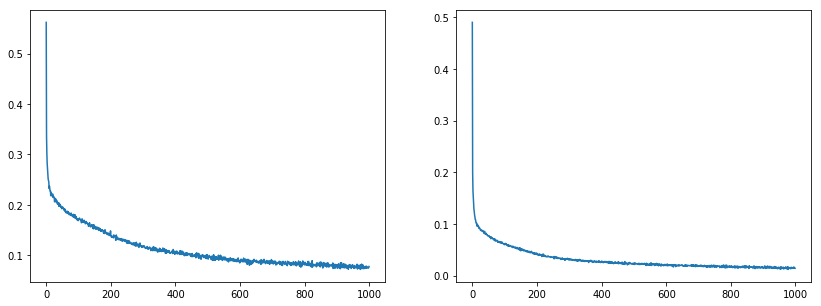

In [20]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')

ax = fig.add_subplot(1, 2, 2)
plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')

plt.show()

## Valiation-set

In [57]:
EPOCHS = 1000
batch_size = 8
steps_per_epoch = np.ceil(len(df_train_norm) / batch_size)

# -------------

inp_shape = df_train_norm.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', batch_input_shape=(None, inp_shape)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

# -------------

class Progress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%10 == 0:
            print('.', end='')


history = model.fit(x=df_train_norm, y=y_train,
                    validation_split=0.2, 
                    batch_size=batch_size, epochs=EPOCHS, 
                    verbose=0, callbacks=[Progress()])



....................................................................................................

In [60]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.007445,0.059503,0.007445,0.249744,0.359410,0.249744,995
996,0.006236,0.054403,0.006236,0.251056,0.361812,0.251056,996
997,0.007710,0.062495,0.007710,0.244789,0.358856,0.244789,997
998,0.006222,0.056575,0.006222,0.261598,0.369399,0.261598,998
999,0.007779,0.061871,0.007779,0.257594,0.366252,0.257594,999


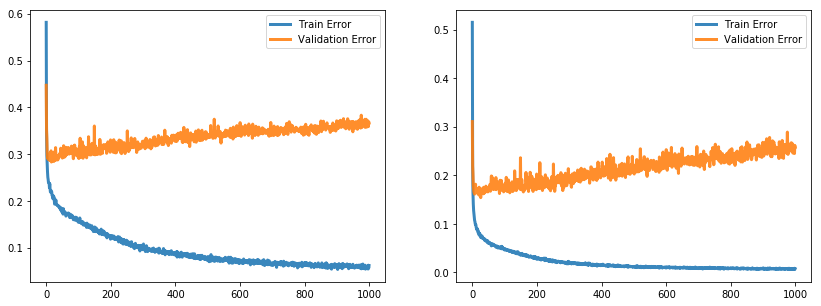

In [61]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(hist['epoch'], hist['mae'], lw=3, alpha=0.88,
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], lw=3, alpha=0.88,
           label='Validation Error')
plt.legend()


ax = fig.add_subplot(1, 2, 2)
plt.plot(hist['epoch'], hist['mse'], lw=3, alpha=0.88,
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], lw=3, alpha=0.88,
           label='Validation Error')
plt.legend()
plt.show()

```
model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)
```

## Saving a model: both architecture and learned parameters

In [17]:
output_path = './lin-reg-model/'

tf.saved_model.save(model, output_path)


In [18]:
! du -h lin-reg-model/*

4.0K	lin-reg-model/assets
36K	lin-reg-model/saved_model.pb
32K	lin-reg-model/variables


In [19]:
! saved_model_cli show --dir lin-reg-model/ --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 9)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output_1'] tensor_info:
      dtype: DT_DOUBLE
      shape: (-1, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


### Restoring the save model

In [20]:
loaded = tf.saved_model.load("lin-reg-model")

loaded

<tensorflow.python.saved_model.load._Loader._recreate_user_object.<locals>._UserObject at 0x7f77e40fdf60>

In [22]:
print(list(loaded.signatures.keys()))

['serving_default']


In [23]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)


{'output_1': TensorSpec(shape=(None, 1), dtype=tf.float64, name='output_1')}


In [ ]:
labeling = infer(tf.constant(x))[pretrained_model.output_names[0]]

decoded = imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]

print("Result after saving and loading:\n", decoded)


In [27]:
batch = next(iter(ds_train))

infer(tf.cast(batch[0], tf.float32))

{'output_1': <tf.Tensor: id=485505, shape=(8, 1), dtype=float64, numpy=
 array([[-0.87393537],
        [ 0.32358603],
        [ 0.65268742],
        [-0.7192516 ],
        [-0.84963454],
        [-0.99195475],
        [-0.49502964],
        [ 1.06865395]])>}

### Prediction on test-set

In [39]:
x_test = np.asarray(df_test_norm, dtype='float32')

y_pred_dict = infer(tf.convert_to_tensor(x_test))


## Extract the results from this dict:

y_pred = y_pred_dict[model.output_names[0]]
# or
y_pred = list(y_pred_dict.values())[0]

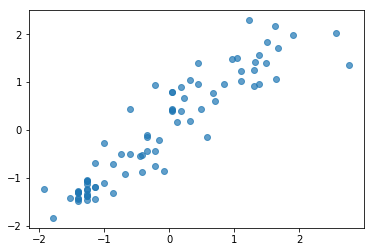

In [40]:
plt.plot(y_test, y_pred, 'o', alpha=0.7)

### Get the architecture via `get_config`

In [80]:
## build the model
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(32, activation='relu', batch_input_shape=(None, 8)))
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation=None))

## get the config
config = model.get_config()

## re-build the model from config
model2 = tf.keras.Sequential.from_config(config)


### Saving the architecture and weights

In [77]:
json_config = model.to_json()

with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)

# Save weights to disk
## to HDF5:
model.save_weights('linreg-model-weights.h5')
## or tf format:
model.save_weights('linreg-model-weights', save_format='tf')



## --> restore

In [79]:
# Reload the model from the 2 files we saved
with open('model_config.json') as json_file:
    json_config = json_file.read()


new_model1 = tf.keras.models.model_from_json(json_config)
new_model1.load_weights('linreg-model-weights.h5')
new_model2 = tf.keras.models.model_from_json(json_config)
new_model2.load_weights('linreg-model-weights.h5')

print('Orig. model: ')
print(model(np.asarray(df_test_norm)[:4]).numpy())
print('New model with transferred weights (from HDF5): ')
print(new_model1(np.asarray(df_test_norm)[:4]).numpy())
print('New model with transferred weights (from tf format): ')
print(new_model2(np.asarray(df_test_norm)[:4]).numpy())

Orig. model: 
[[-0.37397307]
 [-0.6421175 ]
 [-1.138873  ]
 [ 1.9338999 ]]
New model with transferred weights (from HDF5): 
[[-0.37397307]
 [-0.6421175 ]
 [-1.138873  ]
 [ 1.9338999 ]]
New model with transferred weights (from tf format): 
[[-0.37397307]
 [-0.6421175 ]
 [-1.138873  ]
 [ 1.9338999 ]]


### Recommended way

In [74]:
model.save('linreg-model.h5')

new_model = tf.keras.models.load_model('linreg-model.h5')

print(new_model(np.asarray(df_test_norm)[:4]).numpy())

[[-0.37397307]
 [-0.6421175 ]
 [-1.138873  ]
 [ 1.9338999 ]]


### Saving the learned parameters

In [68]:
weights = model.get_weights() 

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation=None))

## Set the input_shape:
model2.build(input_shape=(None, 9))

## Assign the weights:
model2.set_weights(weights)

print('Orig. model: ')
print(model(np.asarray(df_test_norm)[:4]).numpy())
print('New model with transferred weights: ')
print(model2(np.asarray(df_test_norm)[:4]).numpy())

Orig. model: 
[[-0.37397307]
 [-0.6421175 ]
 [-1.138873  ]
 [ 1.9338999 ]]
New model with transferred weights: 
[[-0.37397307]
 [-0.6421175 ]
 [-1.138873  ]
 [ 1.9338999 ]]


## Checkpointing during training